In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [31]:
car_data = pd.read_csv('car_data.csv')

In [32]:
car_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [33]:
car_data.shape

(4340, 8)

In [34]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [35]:
car_data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [36]:
car_data['fuel'].value_counts()

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64

In [37]:
car_data['seller_type'].value_counts()

seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64

In [38]:
print(car_data.transmission.value_counts())

transmission
Manual       3892
Automatic     448
Name: count, dtype: int64


In [39]:
print(car_data.owner.value_counts())

owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


### Encoding the Categorical Data

In [40]:
## here we are manually encoding the labels .. instead of this we could also use the label encoder 

In [41]:
# # encoding "Fuel_Type" column
# car_data['fuel'] = car_data['fuel'].map({'Petrol': 0, 'Diesel': 1, 'CNG': 2, 'LPG': 3, 'Electric': 4})

# # encoding 'Seller_Type' column
# car_data['seller_type'] = car_data['seller_type'].map({'Individual': 0, 'Dealer': 1, 'Trustmark Dealer': 2})

# # encoding 'Transmission' column
# car_data['transmission'] = car_data['transmission'].map({'Manual': 0, 'Automatic': 1})

# # encoding 'Owner' column
# car_data['owner'] = car_data['owner'].map({'First Owner': 0, 'Second Owner': 1, 'Third Owner': 2, 'Fourth & Above Owner': 3, 'Test Drive Car': 4})


In [42]:
columns = ["fuel", "seller_type", "transmission", "owner"]

for col in columns:
    encoder = LabelEncoder()
    car_data[col] = encoder.fit_transform(car_data[col])

In [43]:
car_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,4,1,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0
3,Datsun RediGO T Option,2017,250000,46000,4,1,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2


In [44]:
car_data['fuel'].value_counts()

fuel
1    2153
4    2123
0      40
3      23
2       1
Name: count, dtype: int64

### Splitting the data into Training data and Testing data

In [45]:
X = car_data.drop(['name','selling_price'], axis=1)
Y = car_data['selling_price']

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 11)

## Loading the model

In [47]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

### Model evaluation

In [48]:
## predicting on training data

training_data_prediction = model.predict(X_train)

# R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error : ", error_score)

# mean absolute error
mae = metrics.mean_absolute_error(training_data_prediction, Y_train)
print("Mean Absolute Error : ", mae)

R squared error :  0.4317045200239149
Mean Absolute Error :  230722.8128601349


### Visualizing the error

In [50]:
## here we are using the scatter plot 
## syntx = plt.scatter(y, x)

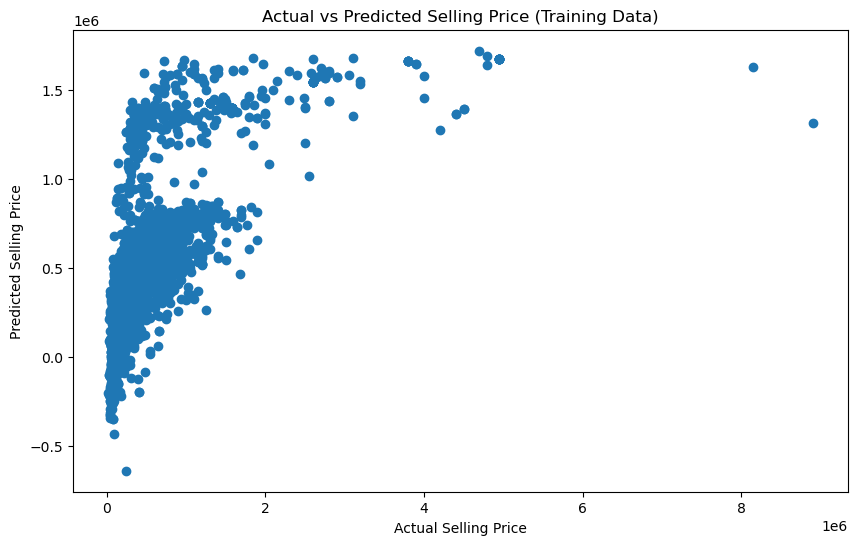

In [54]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Selling Price")  
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price (Training Data)")
plt.show()

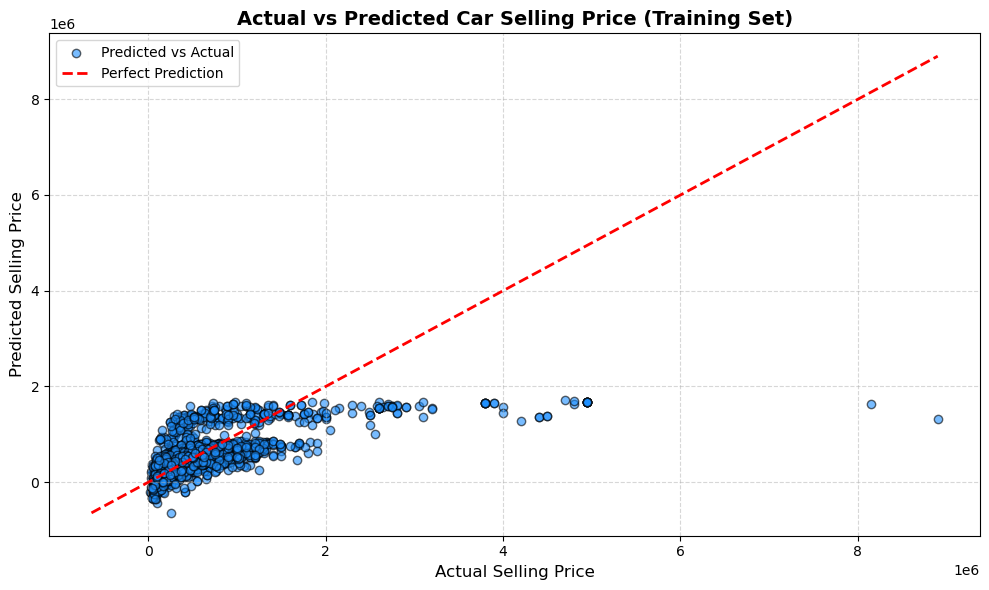

In [55]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_train, training_data_prediction, color='dodgerblue', edgecolor='k', alpha=0.6, label='Predicted vs Actual')

max_val = max(Y_train.max(), training_data_prediction.max())
min_val = min(Y_train.min(), training_data_prediction.min())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2, label='Perfect Prediction')

plt.xlabel("Actual Selling Price", fontsize=12)
plt.ylabel("Predicted Selling Price", fontsize=12)
plt.title("Actual vs Predicted Car Selling Price (Training Set)", fontsize=14, weight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [56]:
## predicting on testing data

testing_data_prediction = model.predict(X_test)

# R squared error
error_score = metrics.r2_score(Y_test, testing_data_prediction)
print("R squared error : ", error_score)

# mean absolute error
mae = metrics.mean_absolute_error(testing_data_prediction, Y_test)
print("Mean Absolute Error : ", mae)

R squared error :  0.5048471452710339
Mean Absolute Error :  233135.81606552095


### Visualizing the error

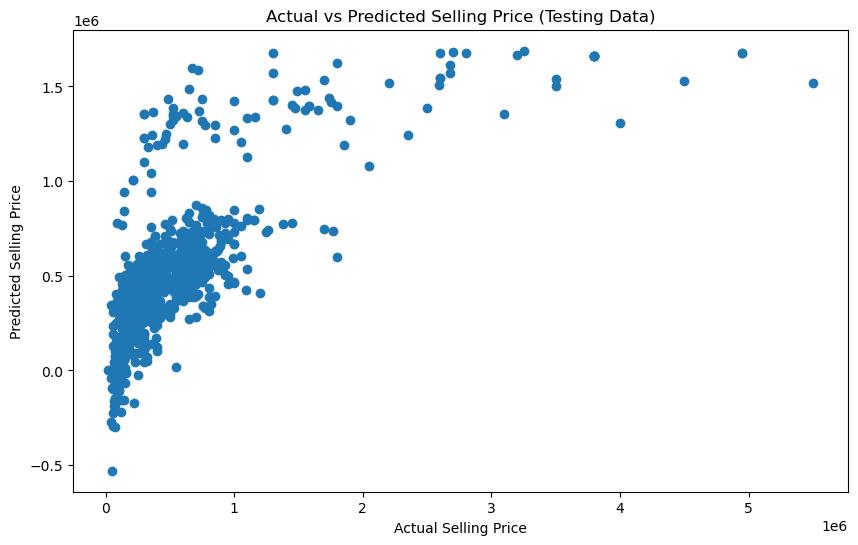

In [57]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, testing_data_prediction)
plt.xlabel("Actual Selling Price")  
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price (Testing Data)")
plt.show()

## Using the Lasso Regression

In [58]:
model1 = Lasso()

model1.fit(X_train, Y_train)

Lasso()

In [59]:
## predicting on training data 

training_data_prediction = model1.predict(X_train)

# R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error : ", error_score)

# mean absolute error  
mae = metrics.mean_absolute_error(training_data_prediction, Y_train)
print("Mean Absolute Error : ", mae)

R squared error :  0.4317045199794902
Mean Absolute Error :  230722.42247062962


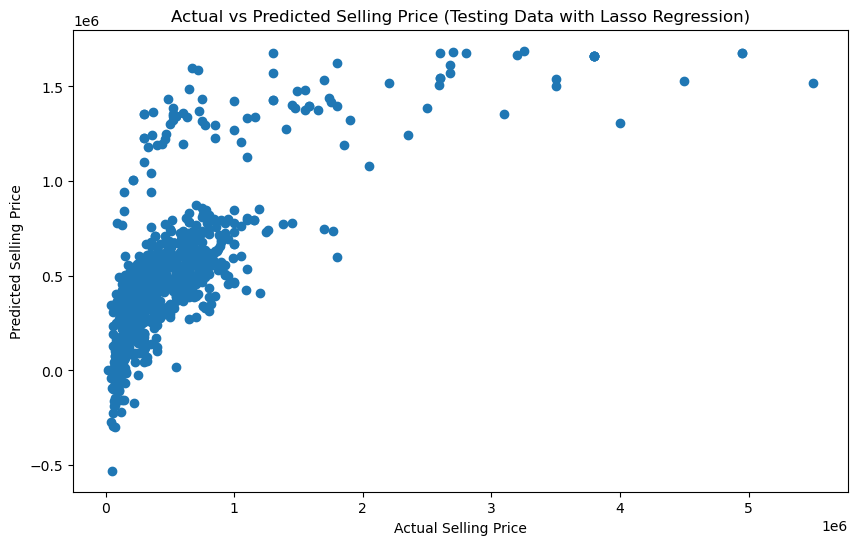

In [60]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, testing_data_prediction)
plt.xlabel("Actual Selling Price")      
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price (Testing Data with Lasso Regression)")
plt.show()

In [61]:
## predicting on testing data

testing_data_prediction = model.predict(X_test)

# R squared error
error_score = metrics.r2_score(Y_test, testing_data_prediction)
print("R squared error : ", error_score)

# mean absolute error
mae = metrics.mean_absolute_error(testing_data_prediction, Y_test)
print("Mean Absolute Error : ", mae)

R squared error :  0.5048471452710339
Mean Absolute Error :  233135.81606552095


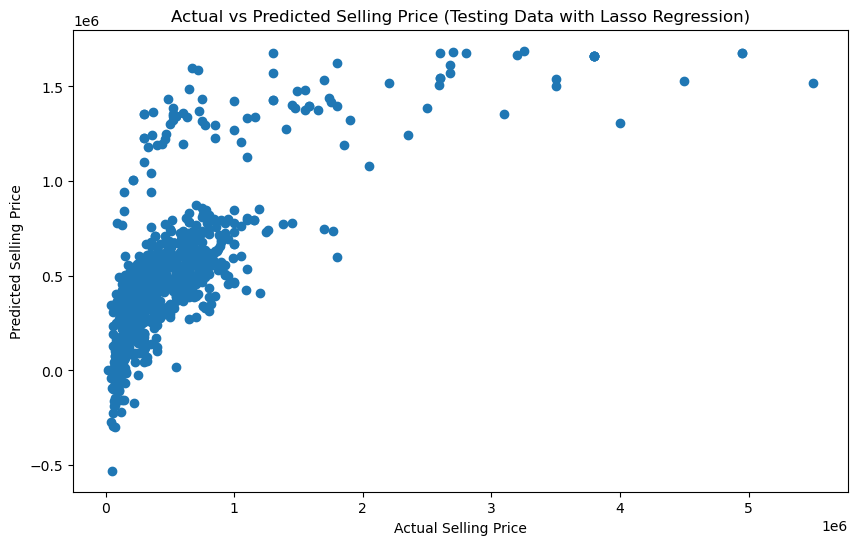

In [62]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, testing_data_prediction)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price (Testing Data with Lasso Regression)")
plt.show()